In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [8]:
prior_df <- bind_rows(
    read_tsv('full_priors/AlD.tsv.gz') %>% mutate(metaedge = 'AlD'),
    read_tsv('full_priors/DpS.tsv.gz') %>% mutate(metaedge = 'DpS'),
    read_tsv('full_priors/DdG.tsv.gz') %>% mutate(metaedge = 'DdG'),
    ) %>% 
    group_by(metaedge) %>%
    mutate(
        analytic_prior = source_degree * target_degree / (
            source_degree * target_degree - source_degree - target_degree + sum(edge) + 1),
        analytic_2 = source_degree * target_degree / sqrt(
            (source_degree * target_degree) ^ 2 + (-source_degree - target_degree + sum(edge) + 1) ^ 2
        ),
    )

Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)
Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)
Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


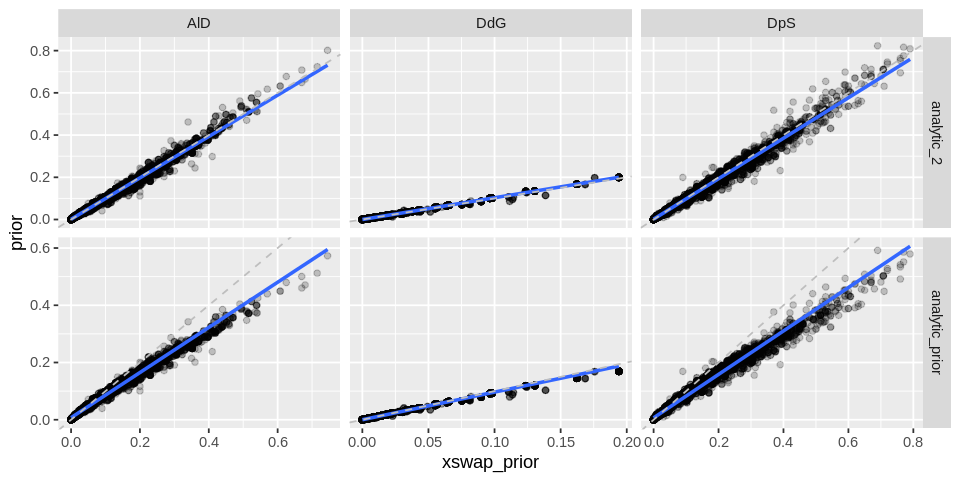

In [10]:
options(repr.plot.width=8, repr.plot.height=4)

# fit <- lm(analytic_prior ~ xswap_prior, data = prior_df)

prior_df %>%
    group_by(metaedge) %>%
    sample_frac(0.5) %>%
    gather('prior_type', 'prior', analytic_prior, analytic_2) %>%
#     sample_n(100000) %>%
    ggplot(aes(x = xswap_prior, y = prior)) +
    geom_point(alpha = 0.2) +
    geom_smooth(method = 'lm') +
    geom_abline(color = 'grey', linetype = 'dashed') +
#     geom_abline(slope = fit$coefficients[2], intercept = 0, color = 'red') +
    facet_grid(rows = vars(prior_type), cols = vars(metaedge), scales = 'free')